In [2]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [56]:
# Define paths to the image folders
parasitized_folder = "../data/Parasitized"
uninfected_folder = "../data/Uninfected"


In [57]:
# Function to read images from a folder and return a list of image arrays and corresponding labels
def read_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))  # Resize image to (128, 128)
            images.append(img)
            labels.append(os.path.basename(folder))  # Use folder name as label
    return images, labels


In [55]:
# Read images from the folders
parasitized_images, parasitized_labels = read_images_from_folder(parasitized_folder)
uninfected_images, uninfected_labels = read_images_from_folder(uninfected_folder)

In [45]:
# Combine the images and labels
images = parasitized_images + uninfected_images
labels = parasitized_labels + uninfected_labels

In [46]:
# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = tf.keras.utils.to_categorical(labels)

In [8]:
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [9]:
# Split data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

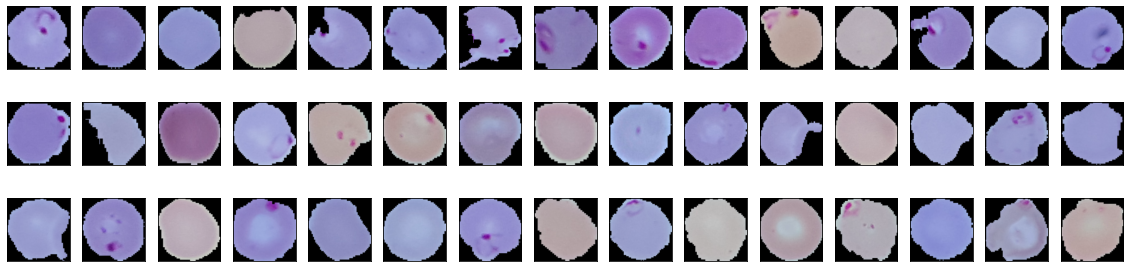

In [10]:
fig = plt.figure(figsize=(20,5))

for i in range(45):
  ax = fig.add_subplot(3,15,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(train_images[i]))

In [11]:
# Preprocess the images (normalize pixel values)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [12]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')  # Two output classes: parasitized and uninfected
])

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model and capture the training history
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


552/552 [==============================] - 188s 336ms/step - loss: 0.3349 - accuracy: 0.8328 - val_loss: 0.1393 - val_accuracy: 0.9594
Epoch 2/10
552/552 [==============================] - 177s 321ms/step - loss: 0.1465 - accuracy: 0.9541 - val_loss: 0.1240 - val_accuracy: 0.9635
Epoch 3/10
552/552 [==============================] - 170s 309ms/step - loss: 0.1320 - accuracy: 0.9570 - val_loss: 0.1138 - val_accuracy: 0.9619
Epoch 4/10
552/552 [==============================] - 172s 311ms/step - loss: 0.1224 - accuracy: 0.9584 - val_loss: 0.1217 - val_accuracy: 0.9569
Epoch 5/10
552/552 [==============================] - 181s 327ms/step - loss: 0.1123 - accuracy: 0.9616 - val_loss: 0.1152 - val_accuracy: 0.9646
Epoch 6/10
552/552 [==============================] - 171s 310ms/step - loss: 0.1025 - accuracy: 0.9648 - val_loss: 0.1172 - val_accuracy: 0.9630
Epoch 7/10
552/552 [==============================] - 173s 314ms/step - loss: 0.0932 - accuracy: 0.9680 - val_loss: 0.1355

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

173/173 [==============================] - 13s 73ms/step - loss: 0.1660 - accuracy: 0.9545
Test accuracy: 0.954463005065918


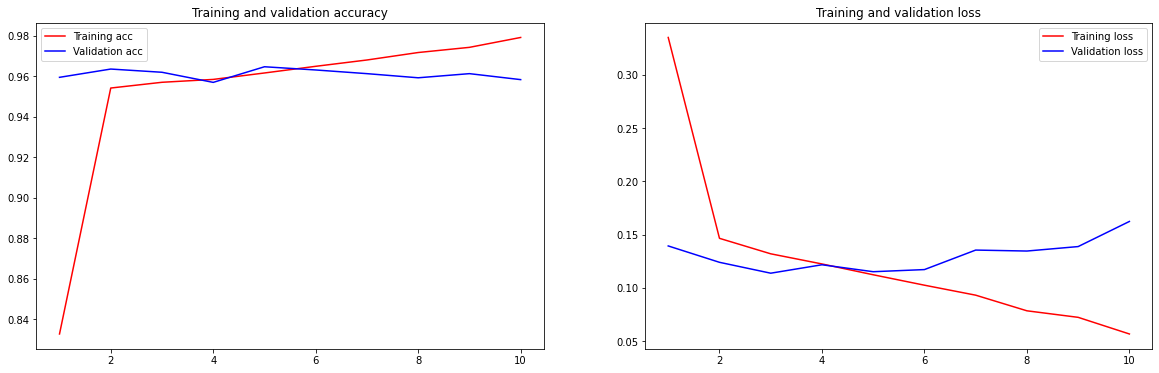

In [16]:
# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# Saving the model
model.save('model.h5')

c:\Users\User\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
